In [20]:
import pandas as pd
df= pd.read_csv(r"C:\Users\nk424\OneDrive\Scans\Desktop\training\Sample_Data\Salary.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0


In [21]:
df.shape

(400, 5)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           371 non-null    object 
 2   Age              365 non-null    float64
 3   EstimatedSalary  369 non-null    float64
 4   Purchased        369 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB


In [23]:
df.isnull().sum()/df.shape[0]*100

User ID            0.00
Gender             7.25
Age                8.75
EstimatedSalary    7.75
Purchased          7.75
dtype: float64

In [24]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,365.000000,369.000000,369.000000
mean,1.569154e+07,38.405479,71368.563686,0.357724
std,7.165832e+04,10.489659,33959.929846,0.479981
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,31.000000,46000.000000,0.000000
50%,1.569434e+07,38.000000,71000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [34]:
# selecting only numerical adataset
df1=df.select_dtypes(include=['int64','float64'])
print(df1.head())
print(df1.isnull().sum())


    User ID   Age  EstimatedSalary  Purchased
0  15624510  19.0          19000.0        0.0
1  15810944  35.0          20000.0        0.0
2  15668575  26.0          43000.0        0.0
3  15603246  27.0          57000.0        0.0
4  15804002  19.0          76000.0        0.0
User ID             0
Age                35
EstimatedSalary    31
Purchased          31
dtype: int64


<Axes: >

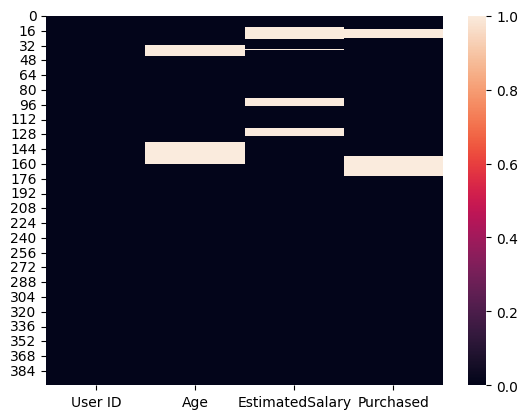

In [36]:
import seaborn as sns
sns.heatmap(df1.isnull())


In [37]:
b=[var for var in df1.columns
   if df1[var].isnull().sum()>10]
b

['Age', 'EstimatedSalary', 'Purchased']

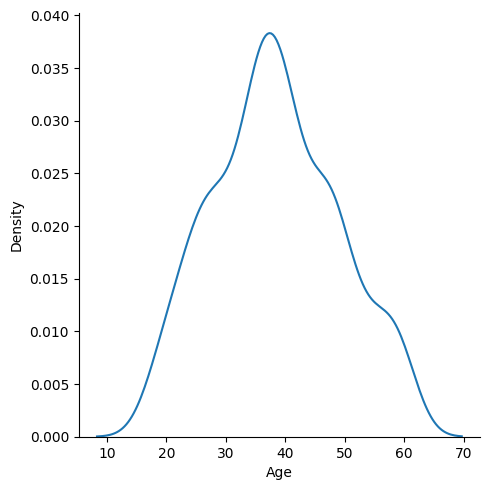

In [ ]:
sns.displot(df1['Age'],kind='kde')#KDE shows a smooth curve that represents how data is distributed.

In [43]:
# fill missing age coluns with mean
df1['Age']=df1['Age'].fillna(df1['Age'].mean)

In [ ]:
df1['Age'].isnull().sum()

np.int64(0)

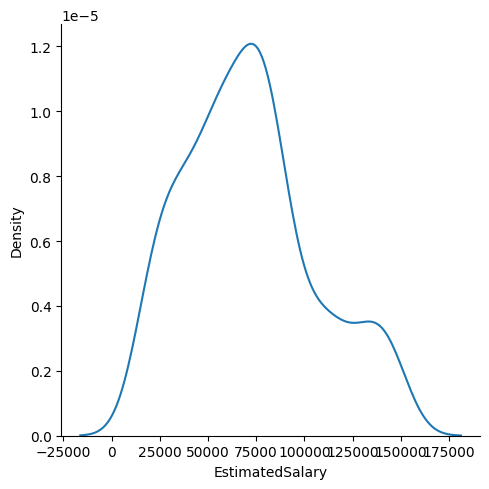

In [45]:
sns.displot(df1['EstimatedSalary'],kind='kde')

In [ ]:
df1['EstimatedSalary']=df1['EstimatedSalary'].fillna(df1['EstimatedSalary'].median)


count                                                   400
unique                                                  116
top       <bound method Series.median of 0      19000.0\...
freq                                                     31
Name: EstimatedSalary, dtype: object

In [47]:
df1['EstimatedSalary'].isnull().sum()

np.int64(0)

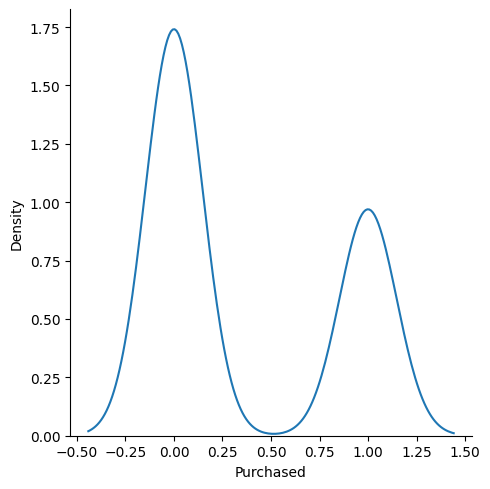

In [48]:
sns.displot(df1['Purchased'],kind='kde')

In [51]:
df1['Purchased']=df1['Purchased'].fillna(df1['Purchased'].median)
df1['EstimatedSalary'].isnull().sum()


np.int64(0)

In [52]:
df1.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

WORKING ON CATEGORICAL DATA

In [53]:
df2=df.select_dtypes(include=[object])
df2

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [54]:
df2.value_counts()

Gender
Female    191
Male      180
Name: count, dtype: int64

In [55]:
df2.mode()

,Gender
0,Female


In [56]:
df2.fillna('Female',inplace=True)


In [60]:
df2.isnull().sum()

Gender    0
dtype: int64

In [64]:
# updating categorical variable from df2 into df
df.update(df2)
df.update(df1)

df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [65]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0.0
1,15810944,Male,35.0,20000.0,0.0
2,15668575,Female,26.0,43000.0,0.0
3,15603246,Female,27.0,57000.0,0.0
4,15804002,Male,19.0,76000.0,0.0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1.0
396,15706071,Male,51.0,23000.0,1.0
397,15654296,Female,50.0,20000.0,1.0
398,15755018,Male,36.0,33000.0,0.0


In [66]:
df.to_csv("final.csv")

In [67]:
import os
os.getcwd()

'c:\\Users\\nk424\\OneDrive\\Scans\\Desktop\\training\\day3'